In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def load_and_prepare_data(file_path):
    """
    Load the dataset and perform initial data cleaning.
    :param file_path: Path to the dataset (CSV file).
    :return: Cleaned DataFrame
    """
    try:
        # Load the dataset from a CSV file
        df = pd.read_csv(file_path)
        
        # Select the first 5 columns
        df = df.iloc[:, :5]

        # Replace 'Unknown' values with NaN
        df.replace('Unknown', np.nan, inplace=True)

        # Rename columns for clarity
        df = df.rename(columns={
            "MONATSZAHL": "Category",
            "AUSPRAEGUNG": "Accident_Type",
            "JAHR": "Year",
            "MONAT": "Month",
            "WERT": "Value"
        })

        print("Data loaded and prepared successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [3]:
def analyze_and_plot_full_data(df):
    """
    Analyze and plot data for all years.
    :param df: DataFrame with the full dataset.
    """
    # Group data by Category and count occurrences
    category_counts = df.groupby("Category").count()

    # Plot the data
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts['Value'], color='blue', alpha=0.6)
    plt.xlabel('Categories')
    plt.ylabel('Number of Values')
    plt.title('Accident Categories in the Full Dataset')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [4]:
def filter_data_till_2020(df):
    """
    Filter data for years up to 2020.
    :param df: DataFrame with the full dataset.
    :return: Filtered DataFrame
    """
    return df[df['Year'] <= 2020]


In [5]:
def analyze_and_plot_filtered_data(df):
    """
    Analyze and plot data for years up to 2020.
    :param df: Filtered DataFrame.
    """
    # Group data by Category and count occurrences
    category_counts = df.groupby("Category").count()

    # Plot the data
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts['Value'], color='green', alpha=0.7)
    plt.xlabel('Categories')
    plt.ylabel('Number of Values')
    plt.title('Accident Categories in the Reduced Dataset (Up to 2020)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [6]:
def main():
    # File path to the dataset
    file_path = 'monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv'

    # Step 1: Load and prepare the dataset
    df = load_and_prepare_data(file_path)
    if df is None:
        return  # Stop execution if data loading fails

    # Step 2: Analyze and plot full dataset
    print("Analyzing and plotting the full dataset...")
    analyze_and_plot_full_data(df)

    # Step 3: Filter data till 2020
    print("Filtering data till 2020...")
    df_filtered = filter_data_till_2020(df)

    # Step 4: Analyze and plot filtered dataset
    print("Analyzing and plotting the filtered dataset...")
    analyze_and_plot_filtered_data(df_filtered)


Data loaded and prepared successfully!
Analyzing and plotting the full dataset...


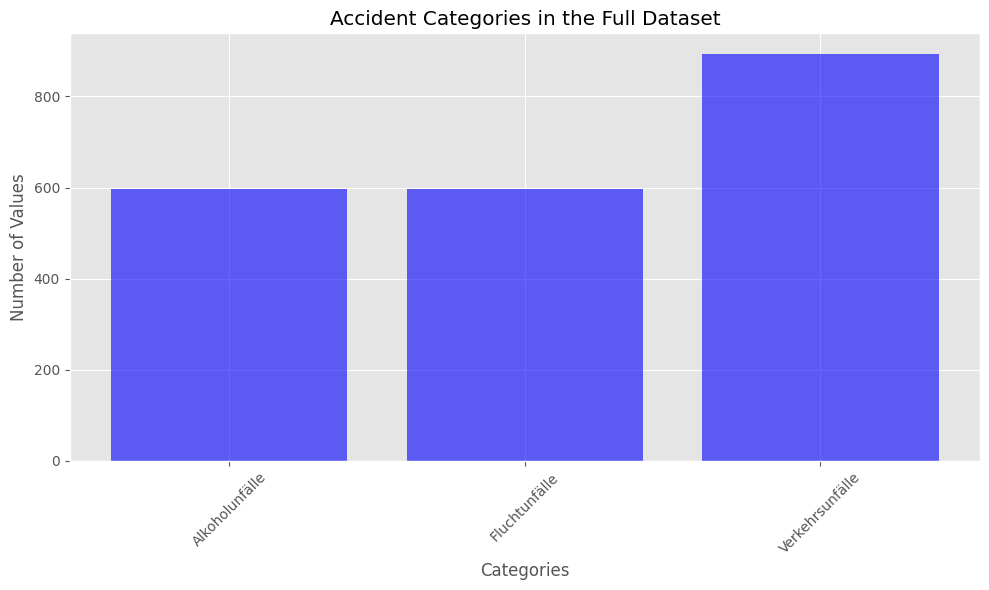

Filtering data till 2020...
Analyzing and plotting the filtered dataset...


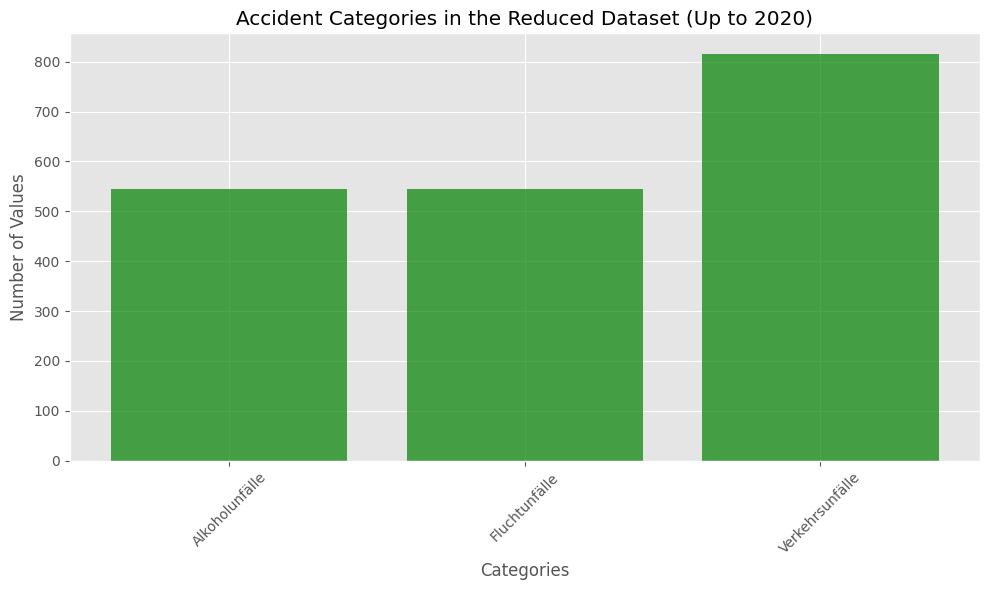

In [7]:
if __name__ == "__main__":
    main()
